# Linear Regression Assignment

### Objective :  Geely Auto a Chinese Automobile Comapny wants to understand the factors affecting price of cars in American Market. 

### Our goal is to :
#### * Idetify the variables significant in predicting price
#### * How well these variables descibe the price of car



Importing Required Libraries for Data Analysis and Linear Regression Model building 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Evaluation using R^2 value
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

Reading the Data from CVS file using pandas

In [2]:
df = pd.read_csv(r'CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Data Pre-processing Steps 

* Extracting Car Names from the column "CarName".
* Correcting invalid Alias used for same Car Brand
* Dropping column "car_ID" due to the insignicance in Analysis

In [3]:
# Droping the variable car_ID as its of no use
df.drop('car_ID',axis = 1,inplace = True)

#Extarcting the company name from CarName
df['CarName'] = df['CarName'].str.lower().str.split(" ").str[0]
dict_company_name = {'vokswagen':'volkswagen', 'vw':'volkswagen',
                     'toyouta':'toyota', 'maxda':'mazda' , 
                     'porcshce':'porsche'}
df['CarName'] = df['CarName'].replace(dict_company_name) 

* Converting the Symboling to object type

In [4]:
df['symboling'] = df['symboling'].astype(object) 

### Co-relation Matrix for Data Understanding  

* Selecting columns which are Numerical and Excluding the "object" data type columns.


In [5]:
list_num = list(df.select_dtypes(exclude = 'object'))
df_num = df[list_num]

#### Corelation Matrix 

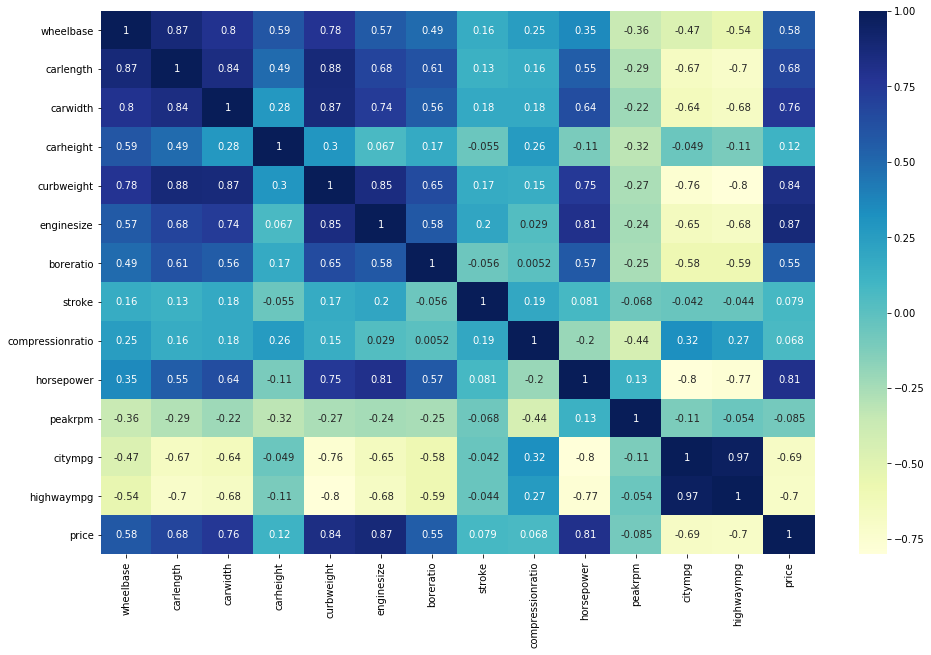

In [6]:
corr_mat = df_num.corr()
plt.figure(figsize = (16, 10))
sns.heatmap(corr_mat, annot = True,cmap="YlGnBu")

## Plotting & Data Visulaizations

#### Scatter plot 

plotting scatter-plot for highly correlated variables, where corelation value is greater than 0.5 .

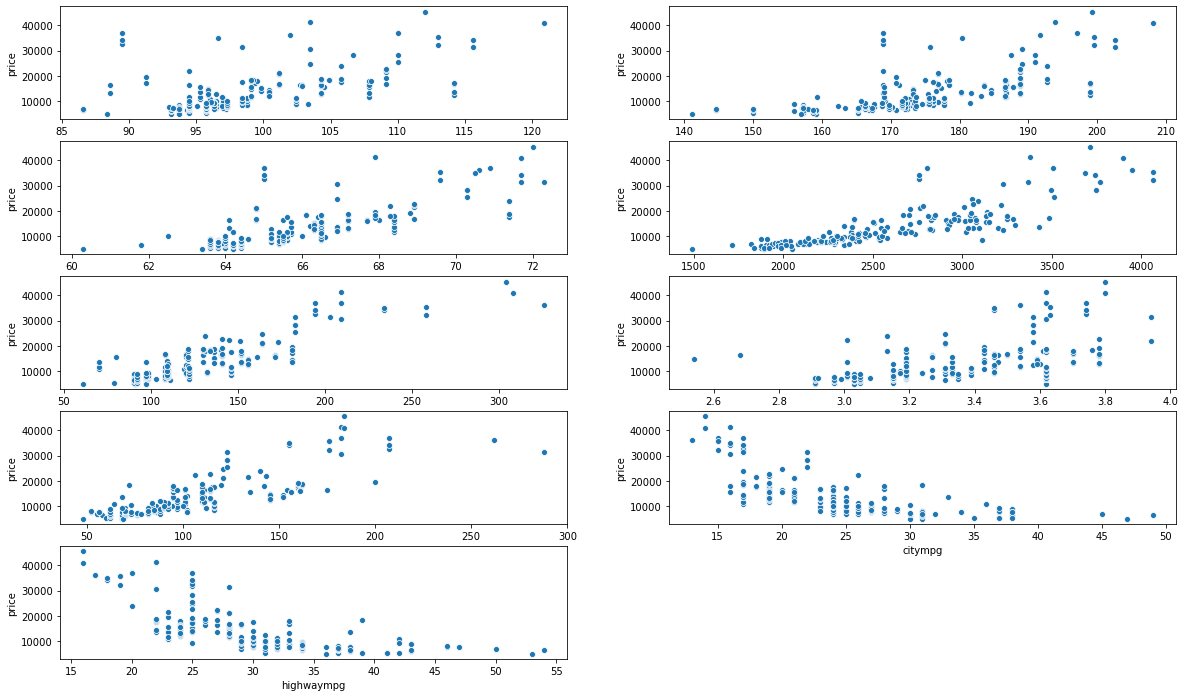

In [7]:
def scatter_plot():
    list_high_corr = corr_mat.loc[abs(corr_mat['price'])>0.5].index[:-1]    
    plt.figure(figsize=(20, 12))
    i = 1
    for val in list_high_corr:
        plt.subplot(5,2,i)
        sns.scatterplot(df[val],df['price'])
        i = i+1

scatter_plot() 

### Observations / Results 

* Following variables are positively correlated with the Price of Car
    * "wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "boreratio", "horsepower".


* Following variables are negatively correlated with the price of the car
    * "citympg", "highwaympg" . 


#### Pair Plot for variables using Seaborn Library 

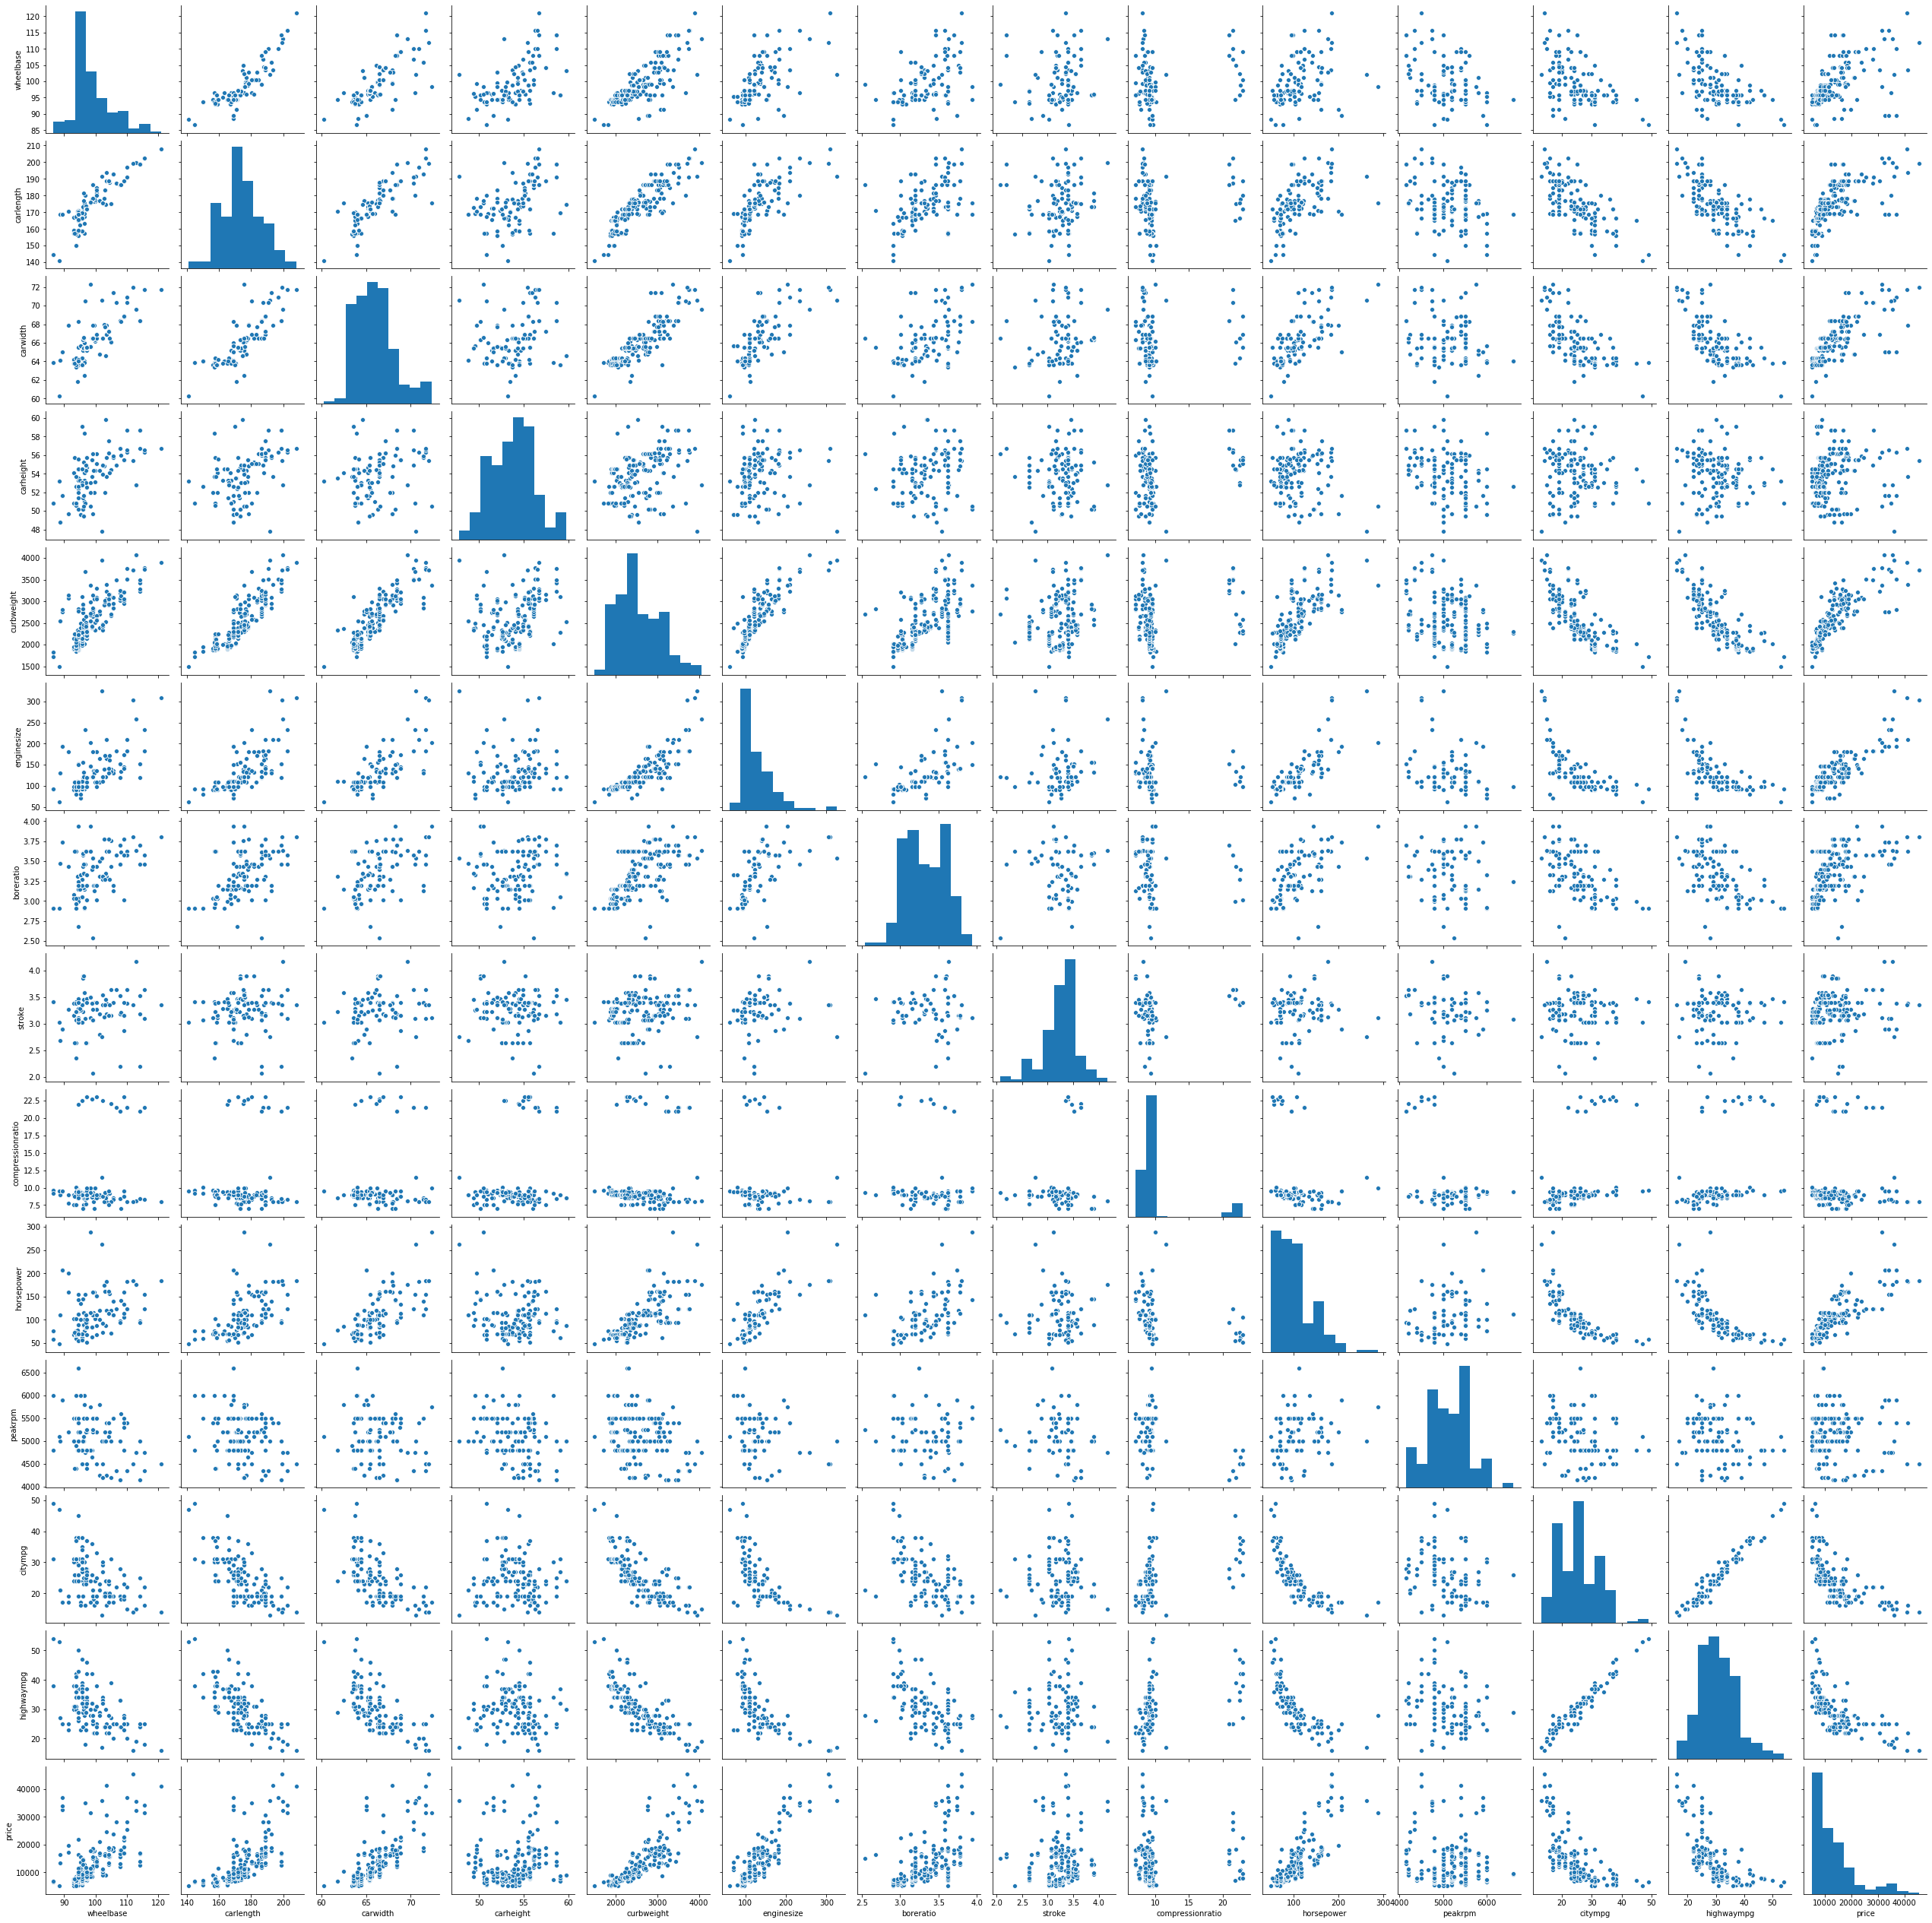

In [8]:
sns.pairplot(df_num)

#### Box - Plot for Categorical variable with Price 

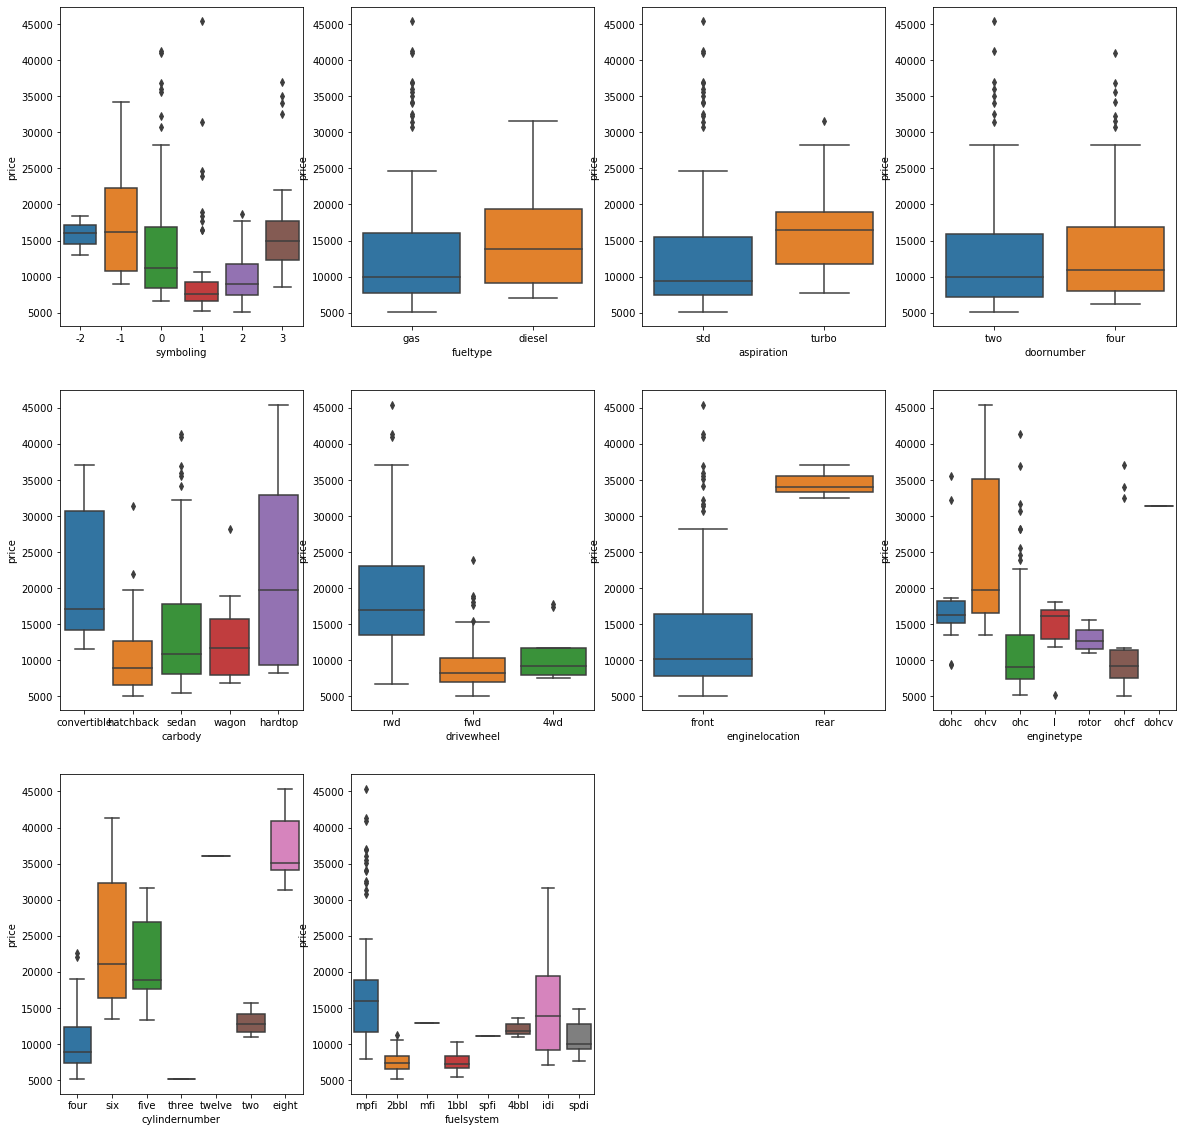

In [9]:
list_category = ['symboling',  'fueltype', 'aspiration',
                 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                 'enginetype', 'cylindernumber', 'fuelsystem']

plt.figure(figsize = (20,20))

i = 1
for cat in list_category:
    plt.subplot(3,4,i)
    sns.boxplot(x = cat, y = 'price', data = df)
    i = i+1



Next, we do a One - Hot Encoding of Catagorcal variables identified and concatenating the columns in Master dataframe. 

In [10]:
# List of columns that are of type 'object'
category_encode = ['symboling', 'CarName', 'fueltype', 'aspiration',
                 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                 'enginetype', 'cylindernumber', 'fuelsystem']

# Function for One-Hot Encoding of catagories 
def hot_encoding(x):
     dummy_df = "{0}_dummies".format(x)
     dummy_df = pd.get_dummies(df[x], drop_first= True) #drop_first create n-1 dummy
     dummy_df = dummy_df.add_suffix("_"+str(x))
     return(dummy_df)

for l in category_encode:    
     z = '{0}_dummies'.format(l)
     z = pd.DataFrame()
    # this command excecutes the function created.
     exec('z = hot_encoding(l)')
     df = pd.concat([df,z],axis=1)
     df.drop([l], axis = 1, inplace = True)

df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three_cylindernumber,twelve_cylindernumber,two_cylindernumber,2bbl_fuelsystem,4bbl_fuelsystem,idi_fuelsystem,mfi_fuelsystem,mpfi_fuelsystem,spdi_fuelsystem,spfi_fuelsystem
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


## Regression Model


* Training and Test Data Creation form Master Dataframe

In [11]:
train , test = train_test_split(df, train_size = 0.8, random_state = 0)

NOTE :  We have identified variables that have a close corelation with the Price of the Car above:

* "wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "boreratio", "horsepower".

* "citympg", "highwaympg" 

We now build various model taking indiviual features and later collective features into consideration.

## Feature Scaling

In [12]:
scaler = MinMaxScaler()

cols = list(train)
train[cols] = scaler.fit_transform(train[cols])

cols_test = list(test)
test[cols_test] = scaler.transform(test[cols_test])

#### Seprating X_train & Y_train  from training data "train"

In [13]:
y_train = train.pop('price')
X_train = train



**MODEL 1:** Taking Single variable "EngineSize" into consideration

           "engine size" has a positive corelation with Car Price

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     506.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.61e-52
Time:                        21:16:28   Log-Likelihood:                 134.39
No. Observations:                 164   AIC:                            -264.8
Df Residuals:                     162   BIC:                            -258.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0365      0.014     -2.539      0.0

Text(0, 0.5, 'enginesize')

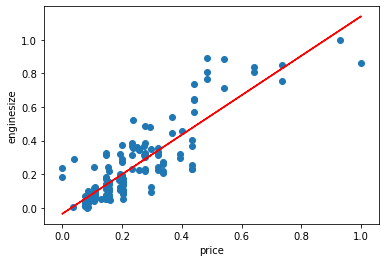

In [14]:

# Adding the beta-0 term or Intercept column to X_train
X_train_1 = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_1).fit()

# Print a summary of the linear regression model obtained
print(lr.summary())

#VISUALIZATION of MODEL 1
plt.scatter(X_train_1.iloc[:, 1], y_train)
plt.plot(X_train_1.iloc[:, 1], -0.0365 + 1.1761*X_train_1.iloc[:, 1], 'r')
plt.xlabel('price')
plt.ylabel('enginesize')



**MODEL 2:** Taking Two variable "curbweight" & "EngineSize" into consideration

           both "EngineSize" & "curbweight" has a positive corelation with Car Price

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     305.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.45e-55
Time:                        21:16:39   Log-Likelihood:                 146.76
No. Observations:                 164   AIC:                            -287.5
Df Residuals:                     161   BIC:                            -278.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0721      0.015     -4.782      0.0

Text(0.5, 0, 'independent  variable')

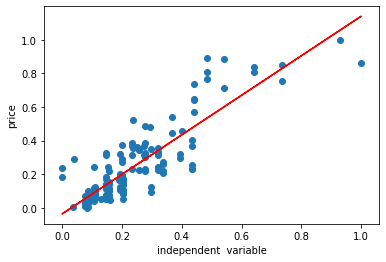

In [15]:

# Adding the beta-0 term or Intercept column to X_train
X_train_2 = sm.add_constant(X_train[['enginesize','curbweight']])

# Create fitted model
lr_2 = sm.OLS(y_train, X_train_2).fit()

# Print a summary of the linear regression model obtained
print(lr_2.summary())

#VISUALIZATION of MODEL 2
x = X_train_2.iloc[:, 1]
y = -0.0721 + 0.7687*X_train_2.iloc[:, 1] + 0.3457*X_train_2.iloc[:, 2]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.scatter(X_train_2.iloc[:,1], y_train)
plt.plot(x,p(x),"r")
plt.ylabel('price')
plt.xlabel('independent  variable')



**MODEL 3:** Taking Three variable "curbweight", 'carwidth'  & "EngineSize" into consideration

           all 'carwidth', "EngineSize" & "curbweight" has a positive corelation with Car Price

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              419.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):                    7.12e-76
Time:                        21:16:44   Log-Likelihood:                          136.03
No. Observations:                 164   AIC:                                     -266.1
Df Residuals:                     161   BIC:                                     -256.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 0, 'independent  variable')

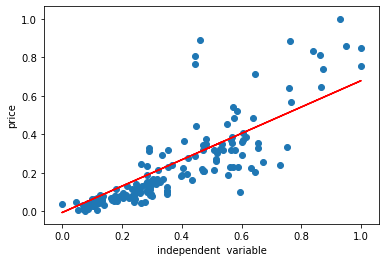

In [16]:

# Adding the beta-0 term or Intercept column to X_train
X_train_3 = X_train[['enginesize','curbweight', 'carwidth']]

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_3).fit()

# Print a summary of the linear regression model obtained
print(lr_3.summary())

#VISUALIZATION of MODEL 3
x = X_train_3.iloc[:, 1]
y = (0.7733*X_train_3.iloc[:,0].values)+ (0.2398*X_train_3.iloc[:, 1].values) - (0.0390*X_train_3.iloc[:, 2].values)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.scatter(X_train_3.iloc[:,1], y_train)
plt.plot(x,p(x),"r")
plt.ylabel('price')
plt.xlabel('independent  variable')


  **NOTE :**  carwidth has coefficient = -0.0390,'-ve sign' is not justifiable as
            carwidth is positively correlated with price.
            
            There may exist multi-collinearity


#### Variance Inflation Factor (VIF) Calculation for "enginesize", "carwidth", "curbwidth"

In [17]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns

#list comprehension

list_vif = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = list_vif
vif.head()


,Features,VIF
0,enginesize,10.885857
1,curbweight,26.332685
2,carwidth,15.096626


   **NOTE :** curbweight has highest VIF value removing this linear equation

**MODEL 4:** Taking Two variable "EngineSize" & "Carwidth into consideration

         Since "curbwidth" had a higher VIF, hence dropping the feature from MODEL 3 gives us MODEL 4.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     303.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.57e-55
Time:                        21:16:54   Log-Likelihood:                 146.18
No. Observations:                 164   AIC:                            -286.4
Df Residuals:                     161   BIC:                            -277.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0916      0.017     -5.268      0.0

Text(0.5, 0, 'independent  variable')

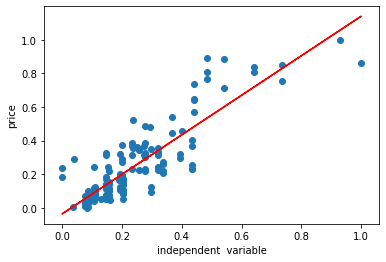

In [18]:

# Adding the beta-0 term or Intercept column to X_train
X_train_4 = sm.add_constant(X_train[['enginesize','carwidth']])

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_4).fit()

# Print a summary of the linear regression model obtained
print(lr_4.summary())

#VISUALIZATION of MODEL 4
x = X_train_4.iloc[:, 1]
y = -0.0916 + 0.9197*X_train_4.iloc[:, 1] + 0.2703*X_train_4.iloc[:, 2]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.scatter(X_train_4.iloc[:,1], y_train)
plt.plot(x,p(x),"r")
plt.ylabel('price')
plt.xlabel('independent  variable')



#### Variance Inflation Factor (VIF) Calculation for "enginesize", "carwidth"

In [19]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns

#list comprehension
list_vif = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = list_vif
vif.head()

,Features,VIF
0,const,4.941904
1,enginesize,2.110859
2,carwidth,2.110859


   **NOTE :**  
   
            Now VIF have reduced significantly,
            we are therefore good to use these two variables 
            ("enginesize", "carwidth") in our model


**MODEL 5:** Taking Two variable "citympg", "highwaympg" into consideration.

    Note: These 2 variables have a Negative corelation with Car Price

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     222.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           7.66e-57
Time:                        21:17:02   Log-Likelihood:                 152.85
No. Observations:                 164   AIC:                            -297.7
Df Residuals:                     160   BIC:                            -285.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0225      0.035      0.640      0.5

Text(0.5, 0, 'independent  variable')

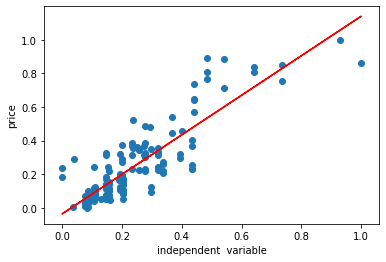

In [20]:

# Adding the beta-0 term or Intercept column to X_train
X_train_5 = sm.add_constant(X_train[['enginesize','carwidth','citympg']])

# Create fitted model
lr_5 = sm.OLS(y_train, X_train_5).fit()

# Print a summary of the linear regression model obtained
print(lr_5.summary())

#VISUALIZATION of MODEL 5
x = X_train_5.iloc[:, 1]
y = 0.0225 + 0.8146*X_train_5.iloc[:, 1] + 0.2226*X_train_5.iloc[:, 2] -0.2098*X_train_5.iloc[:, 3]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.scatter(X_train_5.iloc[:,1], y_train)
plt.plot(x,p(x),"r")
plt.ylabel('price')
plt.xlabel('independent  variable')


**MODEL 6:** Taking ALL Numerical variavbles into consideration.


In [21]:
# taking all Numerical Variables into List

list_num = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
            'highwaympg' ]

# Adding the beta-0 term or Intercept column to X_train
X_train_6 = sm.add_constant(X_train[list_num])

# Create fitted model
lr_6 = sm.OLS(y_train, X_train_6).fit()


print(lr_6.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     69.16
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.73e-56
Time:                        21:17:10   Log-Likelihood:                 177.63
No. Observations:                 164   AIC:                            -327.3
Df Residuals:                     150   BIC:                            -283.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0369      0.078  

,Features,VIF
0,const,134.378300
12,citympg,26.161576
13,highwaympg,23.590939
5,curbweight,16.167646
2,carlength,9.787986
10,horsepower,9.272933
1,wheelbase,8.314970
6,enginesize,7.227468
3,carwidth,6.273632
4,carheight,2.426010




**MODEL 7:** Taking ALL Numerical variavbles into consideration, Excluding  "citympg

   

In [22]:
list_num = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm','highwaympg' ]

# Adding the beta-0 term or Intercept column to X_train
X_train_7= sm.add_constant(X_train[list_num])

# Create fitted model
lr_7 = sm.OLS(y_train, X_train_7).fit()

print(lr_7.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     73.50
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.01e-56
Time:                        21:17:17   Log-Likelihood:                 175.82
No. Observations:                 164   AIC:                            -325.6
Df Residuals:                     151   BIC:                            -285.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0669      0.076  

,Features,VIF
0,const,128.364067
5,curbweight,16.167263
2,carlength,8.968379
10,horsepower,8.503448
1,wheelbase,7.993818
6,enginesize,6.973519
3,carwidth,6.263889
12,highwaympg,6.126041
4,carheight,2.421711
9,compressionratio,2.143851


**MODEL 8:** Taking ALL Numerical variavbles into consideration, Excluding  "citympg", "curbweight"


In [23]:

list_num = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm','highwaympg' ]

# Adding the beta-0 term or Intercept column to X_train
X_train_8= sm.add_constant(X_train[list_num])

# Create fitted model
lr_8 = sm.OLS(y_train, X_train_8).fit()

print(lr_8.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     79.55
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.78e-57
Time:                        21:17:24   Log-Likelihood:                 174.81
No. Observations:                 164   AIC:                            -325.6
Df Residuals:                     152   BIC:                            -288.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0423      0.074  

,Features,VIF
0,const,121.233374
2,carlength,8.351368
9,horsepower,8.121374
1,wheelbase,7.908109
3,carwidth,6.108892
5,enginesize,5.974910
11,highwaympg,4.713940
4,carheight,2.387772
6,boreratio,2.079989
10,peakrpm,1.995178


.
**MODEL 9 :** Taking ALL Numerical variavbles into consideration, Excluding  "citympg", "curbweight", "carlength"

In [24]:

list_num = ['wheelbase', 'carwidth', 'carheight', 'enginesize',
            'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm','highwaympg' ]

# Adding the beta-0 term or Intercept column to X_train
X_train_9= sm.add_constant(X_train[list_num])

# Create fitted model
lr_9 = sm.OLS(y_train, X_train_9).fit()

print(lr_9.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     87.45
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.59e-58
Time:                        21:17:26   Log-Likelihood:                 174.30
No. Observations:                 164   AIC:                            -326.6
Df Residuals:                     153   BIC:                            -292.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0583      0.073  

,Features,VIF
0,const,115.271202
8,horsepower,8.074477
1,wheelbase,6.575773
4,enginesize,5.937054
2,carwidth,5.698636
10,highwaympg,4.492853
3,carheight,2.190499
5,boreratio,2.020495
9,peakrpm,1.994597
7,compressionratio,1.774460


.
**MODEL 10 :** Taking ALL Numerical variavbles into consideration, Excluding  "citympg", "curbweight", "carlength", "wheelbase"

In [25]:

list_num = ['carwidth', 'carheight', 'enginesize','boreratio',
               'stroke', 'compressionratio', 'horsepower', 'peakrpm','highwaympg' ]
               
# Adding the beta-0 term or Intercept column to X_train               
X_train_10 = sm.add_constant(X_train[list_num])

# Create fitted model
lr_10 = sm.OLS(y_train, X_train_10).fit()


print(lr_10.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_10.values, i) for i in range(X_train_10.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.80
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.50e-59
Time:                        21:17:27   Log-Likelihood:                 174.30
No. Observations:                 164   AIC:                            -328.6
Df Residuals:                     154   BIC:                            -297.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0583      0.072  

,Features,VIF
0,const,115.146134
7,horsepower,7.197698
3,enginesize,5.603515
9,highwaympg,4.271527
1,carwidth,3.456509
8,peakrpm,1.985849
4,boreratio,1.955733
6,compressionratio,1.774445
2,carheight,1.445470
5,stroke,1.175351


.
**MODEL 11 :** Taking ALL Numerical variavbles into consideration, Excluding  "citympg", "curbweight", "carlength", "wheelbase", "horsepower"

In [26]:

list_num = ['carwidth', 'carheight', 'enginesize','boreratio',
               'stroke', 'compressionratio','peakrpm','highwaympg' ]
               
# Adding the beta-0 term or Intercept column to X_train
X_train_11 = sm.add_constant(X_train[list_num])

# Create fitted model
lr_11 = sm.OLS(y_train, X_train_11).fit()

print(lr_11.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_11.values, i) for i in range(X_train_11.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.67e-58
Time:                        21:17:29   Log-Likelihood:                 169.87
No. Observations:                 164   AIC:                            -321.7
Df Residuals:                     155   BIC:                            -293.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0103      0.072  

,Features,VIF
0,const,109.209048
8,highwaympg,3.459422
1,carwidth,3.456317
3,enginesize,2.892773
4,boreratio,1.898812
6,compressionratio,1.774118
7,peakrpm,1.562803
2,carheight,1.350301
5,stroke,1.165758


.
**MODEL 12 :** Taking ALL Numerical variavbles into consideration, Excluding  "citympg", "curbweight", "carlength", "wheelbase", "horsepower", "carheight".
    
    * Note: "carheight" is removed as it is an insignificant variable

In [27]:

list_num = ['carwidth', 'enginesize','boreratio',  'stroke',
               'compressionratio','peakrpm','highwaympg' ]
               
# Adding the beta-0 term or Intercept column to X_train_12
X_train_12 = sm.add_constant(X_train[list_num])

# Create fitted model
lr_12 = sm.OLS(y_train, X_train_12).fit()


print(lr_12.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_12.values, i) for i in range(X_train_12.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     119.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.39e-59
Time:                        21:17:30   Log-Likelihood:                 169.85
No. Observations:                 164   AIC:                            -323.7
Df Residuals:                     156   BIC:                            -298.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0068      0.069  

,Features,VIF
0,const,101.440264
7,highwaympg,3.455279
1,carwidth,3.175689
2,enginesize,2.698025
3,boreratio,1.881843
5,compressionratio,1.746079
6,peakrpm,1.512318
4,stroke,1.157772


.
**MODEL 13 :** Taking ALL Numerical variavbles into consideration, Excluding  "citympg", "curbweight", "carlength", "wheelbase", "horsepower", "carheight", "boreratio"

    * Note: "carheight" & 'boreratio' is removed as they are insignificant variable

In [28]:

list_num = ['carwidth', 'enginesize','stroke','compressionratio','peakrpm','highwaympg' ]
               
# Adding the beta-0 term or Intercept column to X_train_13
X_train_13 = sm.add_constant(X_train[list_num])

# Create fitted model
lr_13 = sm.OLS(y_train, X_train_13).fit()

print(lr_13.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_13.columns
vif['VIF'] = [variance_inflation_factor(X_train_13.values, i) for i in range(X_train_13.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     140.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.96e-60
Time:                        21:17:31   Log-Likelihood:                 169.83
No. Observations:                 164   AIC:                            -325.7
Df Residuals:                     157   BIC:                            -304.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0150      0.054  

,Features,VIF
0,const,62.761061
1,carwidth,3.161830
6,highwaympg,3.099724
2,enginesize,2.638956
4,compressionratio,1.745270
5,peakrpm,1.412700
3,stroke,1.104692


.
**MODEL 14 :** Taking ALL Variavbles into consideration


In [29]:
               
# Adding the beta-0 term or Intercept column to X_train
X_train_14 = sm.add_constant(X_train)

# Create fitted model
lr_14 = sm.OLS(y_train, X_train_14).fit()


print(lr_14.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_14.columns
vif['VIF'] = [variance_inflation_factor(X_train_14.values, i) for i in range(X_train_14.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     72.69
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.68e-63
Time:                        21:17:33   Log-Likelihood:                 327.21
No. Observations:                 164   AIC:                            -532.4
Df Residuals:                     103   BIC:                            -343.3
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

,Features,VIF
33,porsche_CarName,inf
36,subaru_CarName,inf
61,two_cylindernumber,inf
55,rotor_enginetype,inf
53,ohcf_enginetype,inf
...,...,...
65,mfi_fuelsystem,2.517168
0,const,0.000000
34,renault_CarName,NaN
50,dohcv_enginetype,NaN



**NOTE :** *Since there are many features manual selection of features would be very cumbersome.Therefore using RFE.*


#### Linear Regression using RFE 

In [30]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))


.
**MODEL 15 :** Taking Variavbles in list 'col" into consideration

In [31]:
col = ['wheelbase', 'carlength', 'carwidth',
       'curbweight','enginesize', 'rear_enginelocation']

X_train_rfe = X_train[col]


# Adding the beta-0 term or Intercept column to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

# Create fitted model
lm_rfe = sm.OLS(y_train,X_train_rfe).fit() 

#Let's see the summary of our linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.48e-66
Time:                        21:17:46   Log-Likelihood:                 184.62
No. Observations:                 164   AIC:                            -355.2
Df Residuals:                     157   BIC:                            -333.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0913    

 .
**MODEL 16 :** Taking Variavbles in list 'col" into consideration

    **NOTE :** *Removing the "Wheelbase" feature 

In [32]:

col = ['carlength', 'carwidth', 'curbweight',
        'enginesize', 'rear_enginelocation']

X_train_rfe2 = X_train[col]


# Adding the beta-0 term or Intercept column to X_train_rfe2
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Create fitted model
lm_rfe2 = sm.OLS(y_train,X_train_rfe2).fit() 

#Let's see the summary of our linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     209.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           9.73e-68
Time:                        21:17:48   Log-Likelihood:                 184.62
No. Observations:                 164   AIC:                            -357.2
Df Residuals:                     158   BIC:                            -338.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0913    

 
**MODEL 17 :** Taking Variavbles in list 'col" into consideration

    **NOTE :** *Removing the "Wheelbase" & "carlength" feature 

In [33]:

col = ['carwidth', 'curbweight','enginesize', 'rear_enginelocation']
X_train_rfe3 = X_train[col]


# Adding the beta-0 term or Intercept column to X_train_rfe3
X_train_rfe3 = sm.add_constant(X_train_rfe3)

# Create fitted model
lm_rfe3 = sm.OLS(y_train,X_train_rfe3).fit() 

#Let's see the summary of our linear model
print(lm_rfe3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     259.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.26e-68
Time:                        21:17:49   Log-Likelihood:                 183.78
No. Observations:                 164   AIC:                            -357.6
Df Residuals:                     159   BIC:                            -342.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1067    

.
**MODEL 17 :** Taking Variavbles in list 'col" into consideration.

    * This contains additional hot encoding columns for Car Names 

In [34]:

col = ['carwidth', 'curbweight','enginesize', 'rear_enginelocation','audi_CarName',
        'bmw_CarName', 'buick_CarName','chevrolet_CarName','dodge_CarName',
        'honda_CarName', 'isuzu_CarName', 'jaguar_CarName', 'mazda_CarName',
        'mercury_CarName', 'mitsubishi_CarName', 'nissan_CarName', 'peugeot_CarName',
        'plymouth_CarName', 'porsche_CarName', 'renault_CarName', 'saab_CarName',
        'subaru_CarName', 'toyota_CarName', 'volkswagen_CarName', 'volvo_CarName']

X_train_rfe4 = X_train[col]

# Adding the beta-0 term or Intercept column to X_train_rfe4
X_train_rfe4 = sm.add_constant(X_train_rfe4)

# Create fitted model
lm_rfe4 = sm.OLS(y_train,X_train_rfe4).fit() 

#Let's see the summary of our linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     108.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.20e-77
Time:                        21:17:51   Log-Likelihood:                 259.09
No. Observations:                 164   AIC:                            -470.2
Df Residuals:                     140   BIC:                            -395.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0428    

#### RESULT :  alfa-romero is base category for Car Name

## Residual Analysis 

Text(0.5, 0, 'Errors')

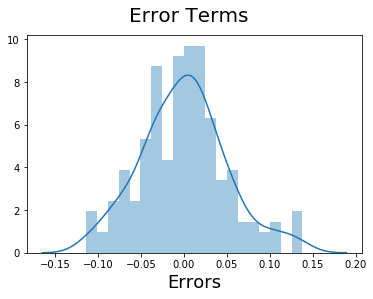

In [35]:
y_train_price = lm_rfe4.predict(X_train_rfe4)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

### Making Predictions 

**NOTE :** *We take all the columns identified above to make our predictions , i.e. *

        * col = ['carwidth', 'curbweight','enginesize', 'rear_enginelocation','audi_CarName',
        'bmw_CarName', 'buick_CarName','chevrolet_CarName','dodge_CarName',
        'honda_CarName', 'isuzu_CarName', 'jaguar_CarName', 'mazda_CarName',
        'mercury_CarName', 'mitsubishi_CarName', 'nissan_CarName', 'peugeot_CarName',
        'plymouth_CarName', 'porsche_CarName', 'renault_CarName', 'saab_CarName',
        'subaru_CarName', 'toyota_CarName', 'volkswagen_CarName', 'volvo_CarName']


Text(0, 0.5, 'y_pred')

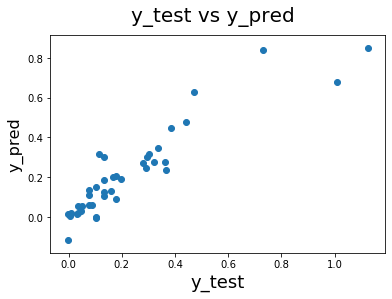

In [36]:

y_test = test.pop('price')
X_test = test

# Adding the beta-0 term or Intercept column to X_test
X_test_rfe4 = sm.add_constant(X_test[col])

# Making predictions using the rfe fourth model
y_pred_rfe4 = lm_rfe4.predict(X_test_rfe4)

# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_rfe4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 


### Model Evalution using R^2 value

In [37]:

print(round(r2_score(y_test, y_pred_rfe4),2))

0.84
